# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key
from pprint import pprint

In [75]:
lat_range = (-90, 90)
long_range = (-180, 180)

lat_long = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, long)

for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
City = []
Lat = []
Long = []              
Max_temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

city_number = 0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
 #for i, city in enumerate(test):
for city in cities:           
    query = f"{url}q={city}&{units}&appid={weather_api_key}"
    response = requests.get(query).json()
   
    try:     
        this = response["name"]
        City.append(this)
    
        lati = response["coord"]["lat"]
        Lat.append(lati)
    
        longi = response["coord"]["lon"]
        Long.append(longi)
    
        temp = response['main']['temp_max']
        Max_temp.append(temp)
    
        hum = response['main']['humidity']
        Humidity.append(hum)
        
        cloud = response["clouds"]["all"]
        Cloudiness.append(cloud)
    
        wind = response["wind"]["speed"]
        Wind_Speed.append(wind)
        
        print(city_number, response["name"])
        
        city_number = city_number + 1
    
    except KeyError:
        pass


0 Cape Town
1 Dikson
2 Rodrigues Alves
3 Thompson
4 Hasaki
5 Caceres
6 Ushuaia
7 Dunedin
8 Jamestown
9 Vondrozo


KeyboardInterrupt: 

In [109]:
print(len(City),
len(Lat),
len(Long),              
len(Max_temp),
len(Humidity),
len(Cloudiness),
len(Wind_Speed))

10 10 10 10 10 10 10


In [115]:
main_df = pd.DataFrame({"City": City,
              "Lat": Lat,
              "Long": Long,
              "Max Temp": Max_temp,
              "Humidity": Humidity,
              "Cloudiness": Cloudiness,
              "Wind Speed": Wind_Speed})
main_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,-33.93,18.42,11.67,87,8,1.00
1,Dikson,73.51,80.55,4.25,91,100,11.61
2,Rodrigues Alves,-7.74,-72.65,26.78,69,84,2.16
3,Thompson,55.74,-97.86,6.00,93,90,2.60
4,Hasaki,35.73,140.83,21.11,77,75,2.60
5,Caceres,39.52,-6.37,17.78,60,100,0.99
6,Ushuaia,-54.80,-68.30,0.00,92,75,8.20
7,Dunedin,-45.87,170.50,2.78,73,91,4.02
8,Jamestown,42.10,-79.24,22.00,60,1,3.10
9,Vondrozo,-22.82,47.28,15.48,100,63,0.43


## Generate Cities List

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [112]:
# Creates variables for relevant table columns
latitude = main_df["Lat"]
temperature = main_df["Max Temp"]
humidity = main_df["Humidity"]
cloudiness = main_df["Cloudiness"]
wind_speed = main_df["Wind Speed"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

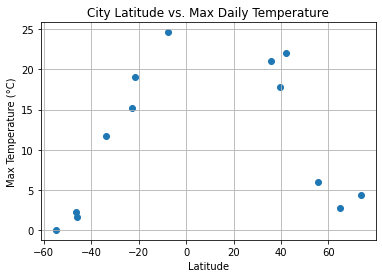

In [95]:
plt.scatter(latitude, temperature)
plt.title("City Latitude vs. Max Daily Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

## Latitude vs. Humidity Plot

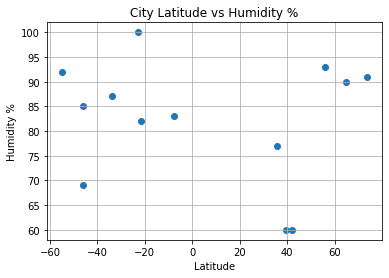

In [96]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

## Latitude vs. Cloudiness Plot

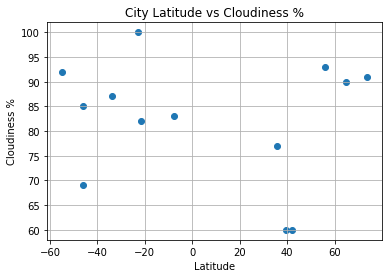

In [97]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

## Latitude vs. Wind Speed Plot

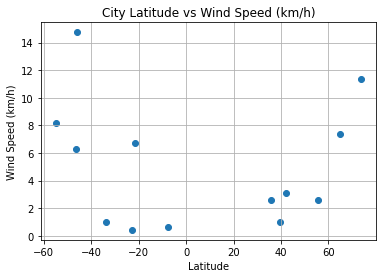

In [98]:
plt.scatter(latitude, wind_speed)
plt.title("City Latitude vs Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(True)

## Linear Regression

In [ ]:
north_df = main_df.loc[main_df["Lat"] > 0]
south_df = main_df.loc[main_df["Lat"] < 0]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight, tumorvol)
vc_fit = vc_slope * weight + vc_int


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression